<a href="https://colab.research.google.com/github/sakshiharde/Cognifyz_Internship/blob/main/Level_2_Cognifyz_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Level 2

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go


In [ ]:
#Loading  the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
res_data=pd.read_csv('/content/drive/MyDrive/content/Dataset .csv')

# Task 1- Table Booking and Online Delivery

Percentage of restaurants offering table booking and online delivery : {'Has Table booking': 12.124384881164275, 'Has Online delivery': 25.662234321013504}


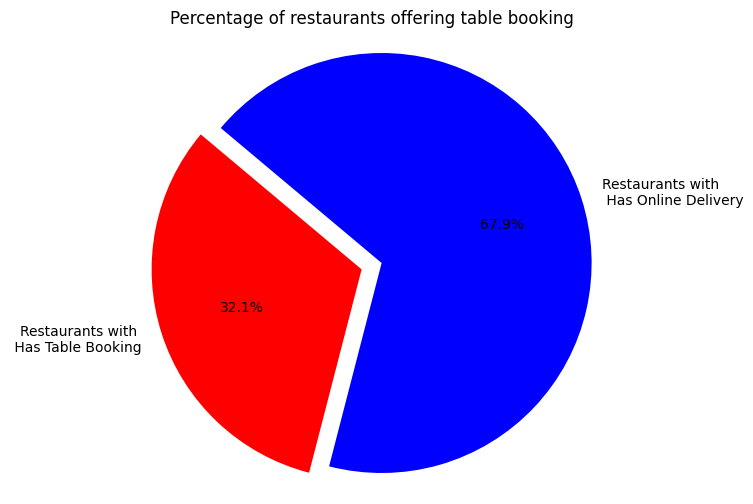

In [ ]:
#Let's determine the percentage of restaurant that offer table booking and online delivery from the dataset
services=['Has Table booking','Has Online delivery']
total_restaurants=len(res_data)

percentages={}
for service in services :
             count_both_services=res_data[service].str.contains('Yes').sum()
             percentage_services=(count_both_services/total_restaurants)*100
             percentages[service]=percentage_services

print("Percentage of restaurants offering table booking and online delivery :",percentages)

#Let's plot the percentage of table booking and online delivery in restaurants
labels= [f'Restaurants with \n {service.replace("_","").title()}' for service in services]
sizes=[percentages[service] for service in services ]
colors=['red','blue']
explode=(0.1,0)

plt.figure(figsize=(8,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=140)
plt.title('Percentage of restaurants offering table booking')
plt.axis('equal')
plt.show()

The pie chart depicts the distribution of retaurants across two categories: "Has Table Booking" and "Has Online Delivery".


*  The red coloured slice represents the percentage of restaurants that offer table booking. The data label indicates this value is 32.1%.
*  The blue coloured slice represents the percentage of restaurants that offer Online delivery. The data label shows this value to be 67.9%.

In essence, the chart indicates that a vast majority of restauranrs in this dataset that offer Online delivery . This could be due to various reasons, such as type of cuisine or nature of establishment.



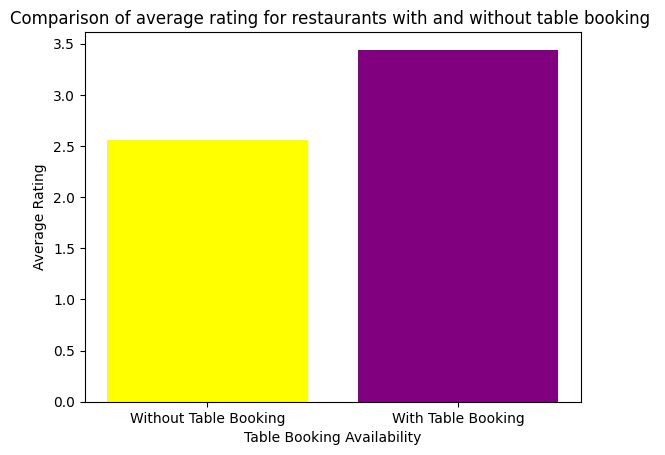

In [ ]:
# Now Let's compare the average ratings of restaurants with table booking and those without table booking

avg_ratings=res_data.groupby('Has Table booking')['Aggregate rating'].mean()

#Visualization
plt.bar(labels,avg_ratings,color=['yellow','purple'])
plt.xlabel('Table Booking Availability')
plt.ylabel('Average Rating')
plt.title('Comparison of average rating for restaurants with and without table booking ')
plt.xticks([0,1],['Without Table Booking','With Table Booking'])
plt.show()



*   **Overall** **Trend**: The chart shows that restaurants with table booking tend to have higher average ratings compared to restaurants without table booking.


1. The average rating for restaurants with table booking is 3.5.
2. The average ratings for restaurants without table booking is 2.5.








*   **Difference in Ratings:**There's a difference of 1.0 point in the average rating between the two categories.



In [ ]:
#replacing the null values with the no
res_data['Has Online delivery'].isnull().sum()
res_data=res_data.dropna(subset=['Has Online delivery'])
res_data['Has Online delivery'].fillna(value='No',inplace=True)
res_data['Has Online delivery'].unique()
yes_count=res_data['Has Online delivery'].value_counts().get('Yes',0)
no_count=res_data['Has Online delivery'].value_counts().get('No',0)
print(yes_count,no_count)

2451 7100


# Task 2- Price Range Analysis

In [ ]:
#Let's determine the most common price range among  all the restaurant
price_range=res_data['Price range']
common_range=price_range.mode()[0]
print("The most common price range among all restaurants is:",common_range)


The most common price range among all restaurants is: 1


In [ ]:
#Let's Calulate the average ratings for each price range
avg_rating_pricerange=res_data.groupby(price_range)['Aggregate rating'].mean()
print("The average ratings for each price range",avg_rating_pricerange)

The average ratings for each price range Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [ ]:
#Let's identify the color that represents the highest average rating among different price range
res_data['Price range']=res_data['Price range'].astype(int)
res_data['Aggregate rating']=res_data['Aggregate rating'].astype(float)
#Calculate the average rating for each price  range
res_avg_rating=res_data.groupby('Price range')['Aggregate rating'].mean()
#Find the price range with the highest average rating
price_range_with_highest_rating=res_avg_rating.idxmax()
#Assuming the column containing the color is named "rating _color"
highest_rating_color=res_data[res_data['Price range']==price_range_with_highest_rating]['Rating color'].iloc[0]
print(f"The price range with the highest average rating is {price_range_with_highest_rating} and the color associated with it is {highest_rating_color}")

The price range with the highest average rating is 4 and the color associated with it is Green


# Task 3- Feature Engineering

Feature engineering involves creating new feature from existing ones to gain better insights from data.

In [ ]:
#New column for restaurant name length
res_data['restaurant_name_length']=res_data['Restaurant Name'].str.len()
res_data['restaurant_name_length']

0       16
1       16
2       22
3        4
4       11
        ..
9546    11
9547    12
9548     5
9549    11
9550    24
Name: restaurant_name_length, Length: 9551, dtype: int64

In [ ]:
#New columns for address feature

res_data['address_length']=res_data['Address'].str.len()
res_data['address_word_count']=res_data['Address'].str.split().str.len()
res_data['address_digit_count']=res_data['Address'].str.extract('(\d+)').sum(axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Encoding table booking column
label=LabelEncoder()
res_data['Has_Table_Booking_Encoded']=label.fit_transform(res_data['Has Table booking'])
#Encoding Has online delivery column
res_data['Has_Online_Delivery_Encoded']=label.fit_transform(res_data['Has Online delivery'])

In [ ]:
pd.get_dummies(res_data,columns=['Has Table booking','Has Online delivery'],prefix="",drop_first=True)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Rating text,Votes,restaurant_name_length,address_length,address_word_count,address_digit_count,Has_Table_Booking_Encoded,Has_Online_Delivery_Encoded,_Yes,_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Excellent,314,16,71,10,0,1,0,True,False
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Excellent,591,16,67,10,2277,1,0,True,False
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Very Good,270,22,56,8,1,1,0,True,False
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Excellent,365,4,70,10,0,0,0,False,False
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Excellent,229,11,64,9,0,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Very Good,788,11,103,13,۱,0,0,False,False
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Very Good,1034,12,77,9,85,0,0,False,False
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Good,661,5,73,9,56,0,0,False,False
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Very Good,901,11,75,9,64,0,0,False,False
